<a href="https://colab.research.google.com/github/adrien-simard/AutoRegression/blob/master/TP1ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np

Visualiser ces series et, pour chacune d'entre elles, donner la famille de modele stochastique qui lui est associée.
Ces series, sont-elles stationnaires ?

In [31]:
a = [-0.0707, 0.2500]
b = [-1.6674, 0.9025]
c = [1.7820, 0.8100]
n=1536 

In [32]:
t=range(-2,n-1)

y=[k*0 for k in t]

for k in range(1,int(n/3)):
    y[k]=-a[0]*y[k-1]-a[1]*y[k-2]+aleas.gauss(0,1)

for k in range(int(n/3)+1,2*int(n/3)):
    y[k]=-b[0]*y[k-1]-b[1]*y[k-2]+aleas.gauss(0,1)

for k in range(2*int(n/3)+1,n):
    y[k]=-c[0]*y[k-1]-c[1]*y[k-2]+aleas.gauss(0,1)

y=y[3:]  # suppression des donnees transitoires
t=t[3:]


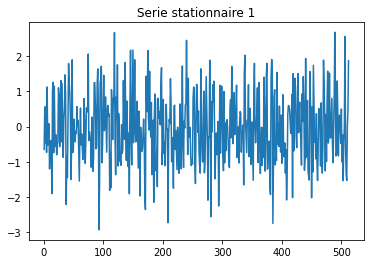

In [35]:
plt.plot(t[0:int(n/3)],y[0:int(n/3)],label='Data =series stationnaires 1')
plt.title("Serie stationnaire 1")
plt.show()

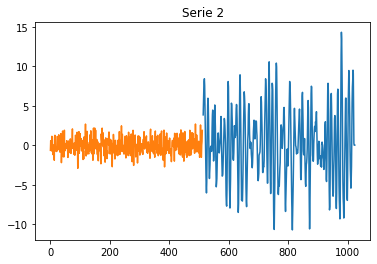

In [40]:
plt.plot(t[int(n/3)+1:2*int(n/3)],y[int(n/3)+1:2*int(n/3)],y[0:int(n/3)],label='Data =series stationnaires 1')
plt.title("Serie 2")
plt.show()

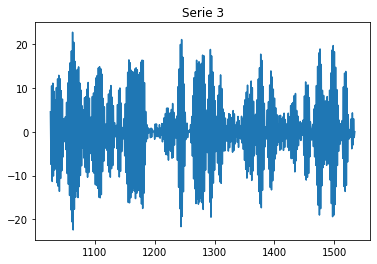

In [39]:
plt.plot(t[2*int(n/3)+1:n],y[2*int(n/3)+1:n],label='Data =series stationnaires 1')
plt.title("Serie 3")
plt.show()

Calculer et visualiser les fonctions d'autocorrelations et les spectres (densites spectrales de puissance) de
y1; y2; y3. Indiquer laquelle de ces 2 fonctions permet aisement de mettre en evidence les differences entre ces 3
processus

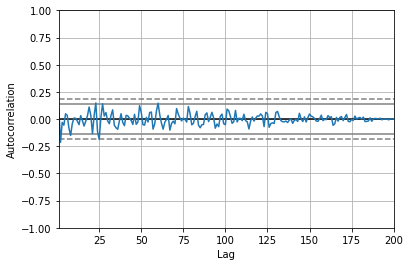

In [86]:
import pandas as pd
pd.plotting.autocorrelation_plot(y[0:200])

In [95]:
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')
    result = r/(variance*n)
    return result
y= np.array(y)
acfy = estimated_autocorrelation(y)



38.052480800346565


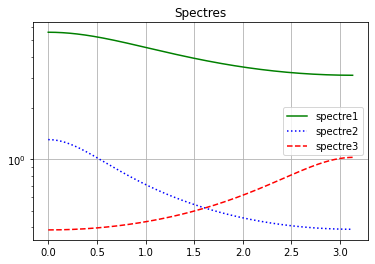

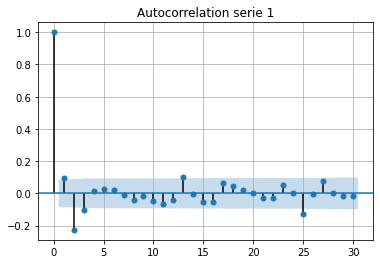

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)
f,mag=spectre(a,b,c)
spectre1 = mag[0]
spectre2 = mag[1]
spectre3 = mag[2]
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
plt.grid() 
plt.legend(['spectre1', 'spectre2','spectre3'])
plt.title("Spectres")
plt.show()

sm.graphics.tsa.plot_acf(y[0:int(n/3)+1], lags=30)
plt.title("Autocorrelation serie 1")
plt.grid() 
plt.show()

On constate que l'autocorrélation de la serie 1 décroit directement après la première valeur. Cela s'explique car le coefficient a[0] est très proche de 0. On conclut que les données ne sont pas corrélées dans le temps. La donnée observé a un instant t ne dépends donc que des données à t-1


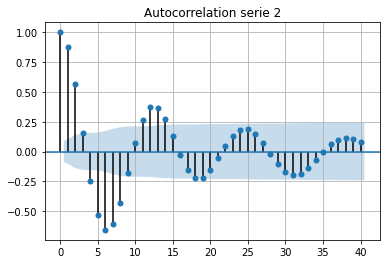

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y[int(n/3)+1:2*int(n/3)], lags=40)
plt.grid() 
plt.title("Autocorrelation serie 2")
plt.show()

La fonction présente des variations positives et négatives, les données ne sont donc pas variables indépendantes et identiquement distribuées

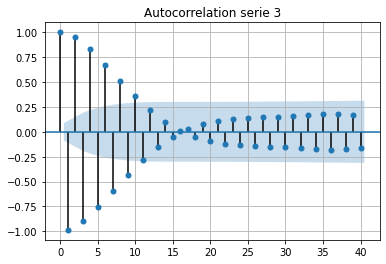

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y[2*int(n/3)+1:n], lags=40)
plt.grid() 
plt.title("Autocorrelation serie 3")
plt.show()

Nous avons ici un beau comprtement auto-regressif car plus on s'éloigne de la donnée initiale plus la corrélation devient faible.